# Vorbereitung

In [1]:
import pandas as pd

daten = pd.read_csv("Datensätze/info1_1617/info1_1617_gesamt.csv") 

import numpy as np

#Erstelle df, alle Wichtigen Features
df = pd.DataFrame()

spalten = ["summe-blatt"+str(i) for i in range(1,13)] + ["summe-uebungs-punkte","zugriffe-auf-ilias","semester","pruefungsversuch"]
df[spalten] = daten[spalten].fillna(0)

df = df.astype(float)

df["fach"] = daten["fach"].fillna("unbekannt")
df["klausur"] = daten["klausur"].fillna(0)
df["klausur-punkte"] = daten["summe-klausur-punkte"]
df["note"] = daten["note"].str.replace(',','.').astype(float)

#df_faktor ist der faktorisierte Datensatz mit den wichtigsten Features
df_faktor = df.copy()

df_faktor.loc[df_faktor["fach"] == "informatik", "fach"] = 0
df_faktor.loc[df_faktor["fach"] == "mathematik", "fach"] = 1
df_faktor.loc[df_faktor["fach"] == "physik", "fach"] = 2
df_faktor.loc[df_faktor["fach"] == "informationswissenschaften", "fach"] = 3
df_faktor.loc[(df_faktor["fach"]!=0)&(df_faktor["fach"]!=1)&(df_faktor["fach"]!=2)&(df_faktor["fach"]!=3), "fach"] = 4
df_faktor["fach"] = df_faktor["fach"].astype(int)

df_faktor.loc[df_faktor["klausur"]==":hauptklausur", "klausur"] = "1"
df_faktor.loc[df_faktor["klausur"]==":nachklausur", "klausur"] = "2"
df_faktor["klausur"] = df_faktor["klausur"].astype(int)

df_faktor.drop(["note", "klausur-punkte", "klausur", "pruefungsversuch"], axis=1, inplace=True)
display(df_faktor)

df_uebung = df_faktor[df_faktor["summe-uebungs-punkte"]>0]
display(df_uebung)

,summe-blatt1,summe-blatt2,summe-blatt3,summe-blatt4,summe-blatt5,summe-blatt6,summe-blatt7,summe-blatt8,summe-blatt9,summe-blatt10,summe-blatt11,summe-blatt12,summe-uebungs-punkte,zugriffe-auf-ilias,semester,fach
0,100.0,100.0,95.0,85.0,125.0,0.0,100.0,118.0,0.0,0.0,0.0,0.0,723.0,82.0,2.0,0
1,100.0,99.0,100.0,90.0,125.0,108.0,100.0,0.0,0.0,33.0,0.0,100.0,855.0,183.0,2.0,0
2,84.0,25.0,0.0,0.0,25.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,81.0,2.0,0
3,94.0,60.0,50.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,91.0,2.0,3
4,77.0,72.0,78.0,94.0,102.0,89.0,100.0,0.0,0.0,0.0,0.0,0.0,612.0,86.0,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,100.0,100.0,70.0,90.0,95.0,18.0,70.0,120.0,25.0,0.0,0.0,20.0,708.0,409.0,2.0,0
822,95.0,95.0,20.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235.0,71.0,2.0,3
823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,8.0,3
824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4


,summe-blatt1,summe-blatt2,summe-blatt3,summe-blatt4,summe-blatt5,summe-blatt6,summe-blatt7,summe-blatt8,summe-blatt9,summe-blatt10,summe-blatt11,summe-blatt12,summe-uebungs-punkte,zugriffe-auf-ilias,semester,fach
0,100.0,100.0,95.0,85.0,125.0,0.0,100.0,118.0,0.0,0.0,0.0,0.0,723.0,82.0,2.0,0
1,100.0,99.0,100.0,90.0,125.0,108.0,100.0,0.0,0.0,33.0,0.0,100.0,855.0,183.0,2.0,0
2,84.0,25.0,0.0,0.0,25.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,81.0,2.0,0
3,94.0,60.0,50.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,91.0,2.0,3
4,77.0,72.0,78.0,94.0,102.0,89.0,100.0,0.0,0.0,0.0,0.0,0.0,612.0,86.0,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0.0,0.0,40.0,55.0,75.0,0.0,70.0,50.0,0.0,0.0,0.0,0.0,290.0,0.0,0.0,1
820,80.0,62.0,28.0,49.0,45.0,26.0,34.0,69.0,0.0,29.0,49.0,0.0,471.0,232.0,5.0,2
821,100.0,100.0,70.0,90.0,95.0,18.0,70.0,120.0,25.0,0.0,0.0,20.0,708.0,409.0,2.0,0
822,95.0,95.0,20.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235.0,71.0,2.0,3


# Korrelationen

## Nur bearbeitete Übungsblätter

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


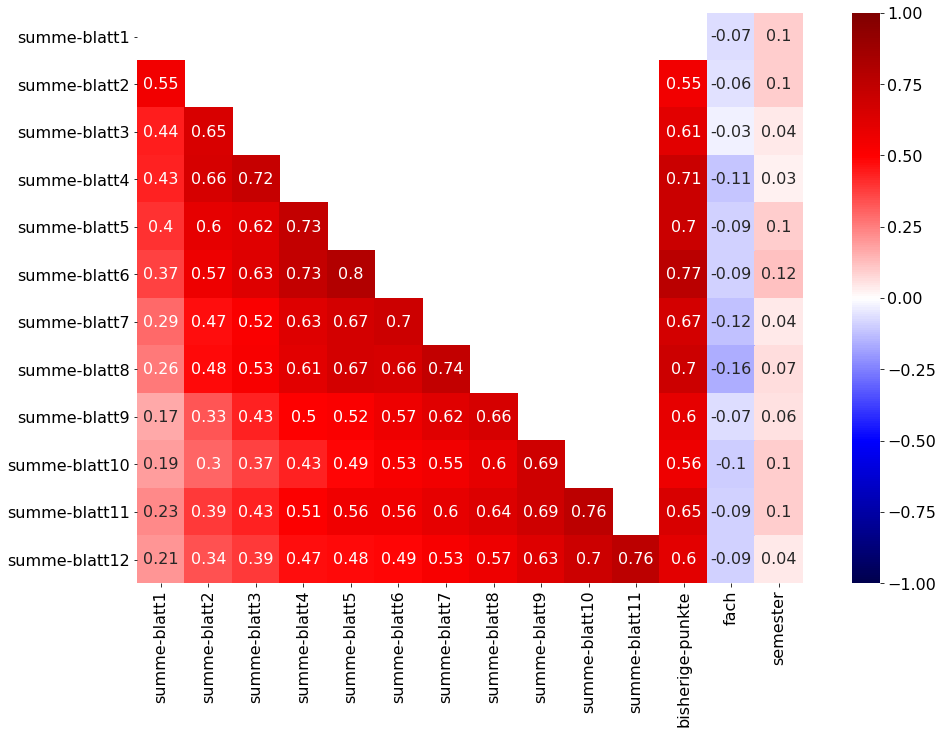

In [2]:
attributes = ["summe-blatt1","summe-blatt2","summe-blatt3","summe-blatt4","summe-blatt5","summe-blatt6","summe-blatt7","summe-blatt8","summe-blatt9","summe-blatt10","summe-blatt11","summe-blatt12","fach","semester"]
corrs = round(df_uebung[attributes].corr(method="spearman"),2)

for j in range(1,13):
    for i in range(j,13):
        corrs.loc["summe-blatt"+str(j)]["summe-blatt"+str(i)] = np.nan
corrs.drop(["fach","semester"], inplace=True)
corrs.drop("summe-blatt12", axis=1, inplace=True)

korrelation_bisherigePunkte = []
for aktuellesBlatt in range(1,13):
    df_uebung["bisherigeSumme"] = df_uebung[["summe-blatt"+str(i) for i in range(1,aktuellesBlatt)]].sum(axis=1)
    korrelation_bisherigePunkte += [df_uebung[["summe-blatt"+str(aktuellesBlatt),"bisherigeSumme"]].corr(method="spearman")["bisherigeSumme"]["summe-blatt"+str(aktuellesBlatt)]]

corrs["bisherige-punkte"] = korrelation_bisherigePunkte

corrs = corrs.reindex(columns=["summe-blatt"+str(i) for i in range(1,12)] + ["bisherige-punkte","fach","semester"])

import seaborn as sn
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16
plt.figure(figsize=(15, 10))
sn.heatmap(corrs, annot=True, square=True, vmin=-1, vmax=1, cmap="seismic")
plt.tight_layout(pad=0.0)
plt.show()

## Alle Übungsblätter

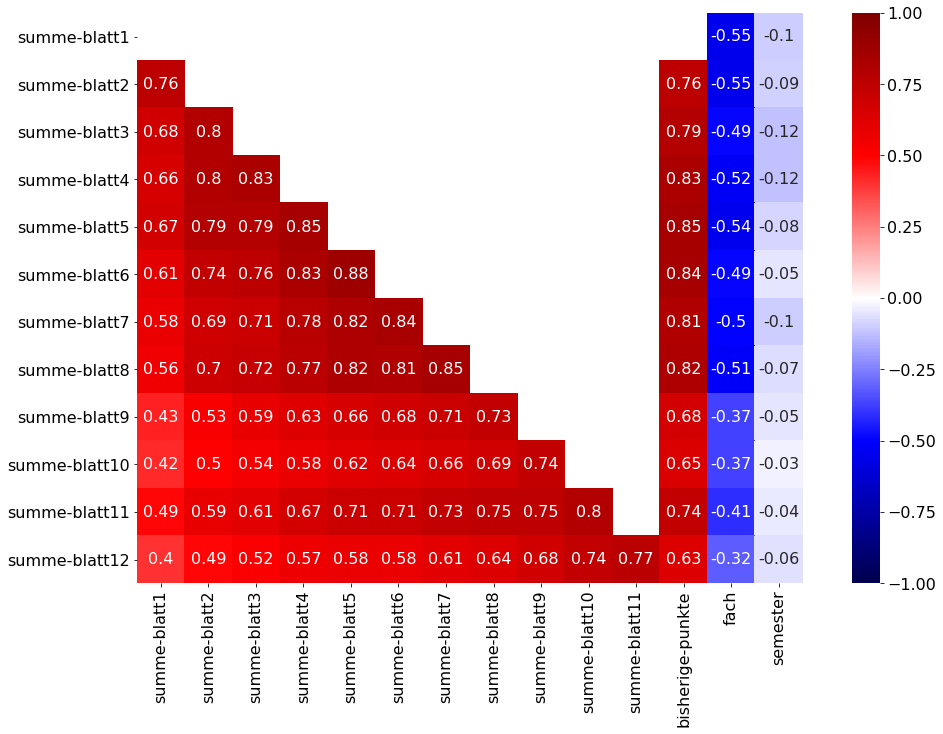

In [3]:
corrs = round(df_faktor[attributes].corr(method="spearman"),2)

for j in range(1,13):
    for i in range(j,13):
        corrs.loc["summe-blatt"+str(j)]["summe-blatt"+str(i)] = np.nan
corrs.drop(["fach","semester"], inplace=True)
corrs.drop("summe-blatt12", axis=1, inplace=True)

korrelation_bisherigePunkte = []
for aktuellesBlatt in range(1,13):
    df_faktor["bisherigeSumme"] = df_faktor[["summe-blatt"+str(i) for i in range(1,aktuellesBlatt)]].sum(axis=1)
    korrelation_bisherigePunkte += [df_faktor[["summe-blatt"+str(aktuellesBlatt),"bisherigeSumme"]].corr(method="spearman")["bisherigeSumme"]["summe-blatt"+str(aktuellesBlatt)]]

corrs["bisherige-punkte"] = korrelation_bisherigePunkte

corrs = corrs.reindex(columns=["summe-blatt"+str(i) for i in range(1,12)] + ["bisherige-punkte","fach","semester"])

plt.rcParams['font.size'] = 16
plt.figure(figsize=(15, 10))
sn.heatmap(corrs, annot=True, square=True, vmin=-1, vmax=1, cmap="seismic")
plt.tight_layout(pad=0.0)
plt.show()

### Multipler Korrelationskoeffizient

In [4]:
#Letzte zwei Blätter
summe = np.array([0.76,0.8,0.83,0.85,0.88,0.84,0.85,0.73,0.74,0.8,0.77])
summe2 = np.array([0.68,0.8,0.79,0.83,0.82,0.81,0.71,0.69,0.75,0.74])
print(np.sqrt((summe[1:]**2+summe2**2 - 2*summe[:1]*summe[1:]*summe2)/(1-summe[:1]**2)).round(2))

#Bisherige Punkte und letztes Blatt
bisher = np.array([0.76,0.79,0.83,0.85,0.84,0.81,0.82,0.68,0.65,0.74,0.63])
print(np.sqrt((summe[1:]**2+bisher[1:]**2 - 2*bisher[:-1]*summe[1:]*bisher[1:])/(1-bisher[:-1]**2)).round(2))

#Fach und letztes Blatt
fach = np.array([0.55,0.55,0.49,0.52,0.54,0.49,0.5,0.51,0.37,0.37,0.41,0.32])
print(np.sqrt((summe**2+fach[1:]**2 - 2*fach[:-1]*summe*fach[1:])/(1-fach[:-1]**2)).round(2))

[0.81 0.87 0.88 0.91 0.89 0.89 0.77 0.77 0.83 0.81]
[0.85 0.88 0.89 0.9  0.86 0.88 0.74 0.77 0.85 0.78]
[0.78 0.8  0.84 0.86 0.88 0.85 0.86 0.73 0.75 0.81 0.77]


# Verteilung der Übungspunkte

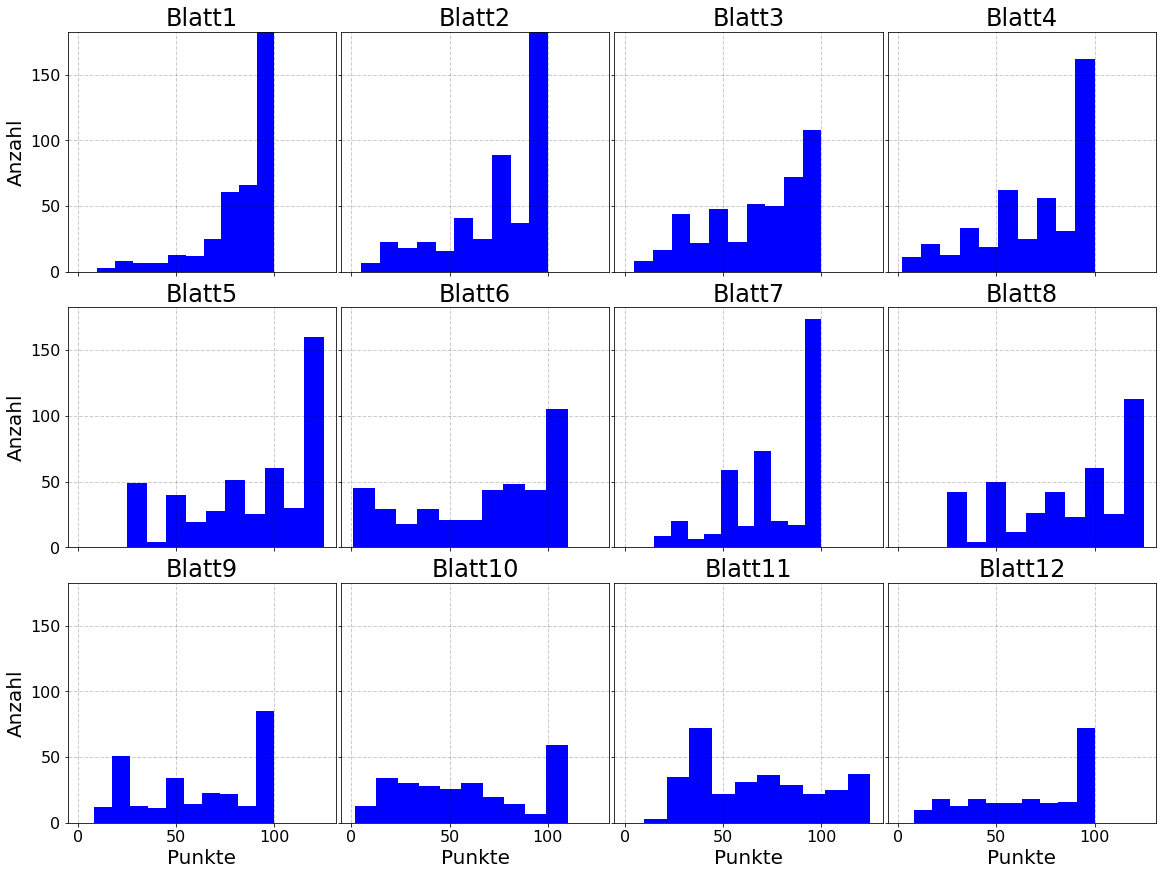

In [5]:
df_uebung[["summe-blatt"+str(i) for i in range(1,13)]]

plt.rcParams['font.size'] = 16
fig, axs = plt.subplots(3, 4, figsize=(16, 12), sharex="all", sharey="all")

for zeile in range(0,3):
    for spalte in range(0,4):
        axs[zeile][spalte].grid(color="black", linestyle="--", linewidth=1, alpha=0.2)
        axs[zeile][spalte].hist(df_uebung["summe-blatt"+str(zeile*4+spalte+1)][df_uebung["summe-blatt"+str(zeile*4+spalte+1)] > 0], bins=10, color="b")
        axs[zeile][spalte].set(ylim=[0,182.5])
        axs[zeile][spalte].set_title("Blatt"+str(zeile*4+spalte+1), fontsize=24)
        if spalte == 0: axs[zeile][spalte].set_ylabel("Anzahl", fontsize=20)
        if zeile == 2: axs[zeile][spalte].set_xlabel("Punkte", fontsize=20)

plt.tight_layout(pad=0.1)
#plt.savefig("LaTeX/fig/2.1_Blaetter-Anzahl.png", transparent=True)
plt.show()

In [6]:
from scipy import stats

for i in range(1,13):
    print("Blatt"+str(i)+":", stats.kstest(df_uebung["summe-blatt"+str(i)][df_uebung["summe-blatt"+str(i)] > 0], "uniform"))
    print(stats.kstest(df_uebung["summe-blatt"+str(i)][df_uebung["summe-blatt"+str(i)] > 0], stats.uniform(loc=0.0, scale=100.0).cdf))

#print(stats.kstest(df_klausur["klausur-punkte"], "norm"))

for i in range(1,13):
    if i == 5 or i == 8 or i == 11:
        punkte = 125
    elif i == 6 or i == 10:
        punkte = 110
    else:
        punkte = 100
    laenge = len(df_uebung["summe-blatt"+str(i)][df_uebung["summe-blatt"+str(i)]>0])
    erwartet = [laenge/punkte] * punkte
    haeufigkeit = df_uebung["summe-blatt"+str(i)][df_uebung["summe-blatt"+str(i)]>0].value_counts().values
    haeufigkeit = np.append(haeufigkeit, [0]*(punkte-len(haeufigkeit)))
    differenz = erwartet-haeufigkeit
    chi = sum((differenz**2) / erwartet)
    print(round(chi))

Blatt1: KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.5802489626556017, pvalue=1.507699093353545e-154)
Blatt2: KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.4177419354838709, pvalue=6.36230646986141e-79)
Blatt3: KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.2675675675675675, pvalue=1.4772839664748448e-28)
Blatt4: KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.3158198614318707, pvalue=6.841659078897187e-39)
Blatt5: KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.48648068669527894, pvalue=4.030969469298209e-102)
Blatt6: KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.28683168316831675, pvalue=6.455034434847122e-30)
Blatt7: KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.3881188118811881, pvalue=2.6711969943320525e-55)
Blatt8: KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.4487405541561712, pvalue=1.8697918795784786e-73)
Blatt9: KstestResult(stati

# Vorhersage

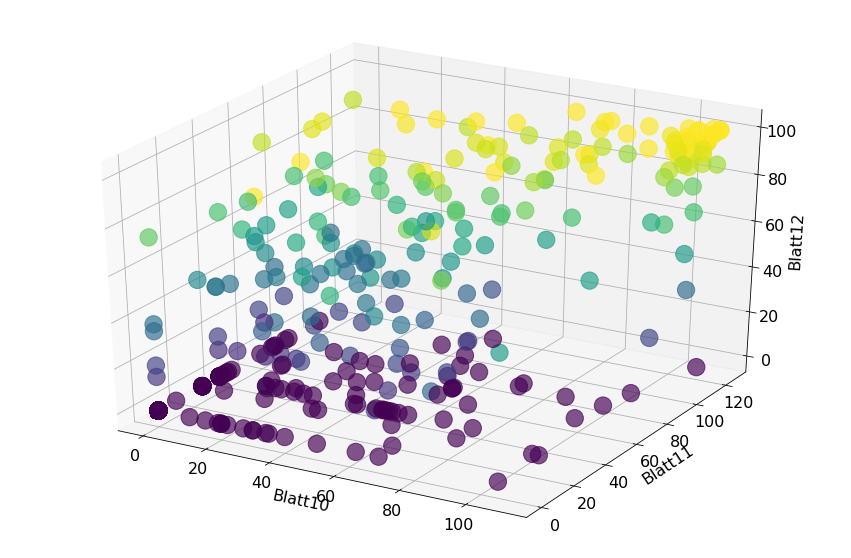

In [7]:
#%matplotlib notebook
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_uebung["summe-blatt10"], df_uebung["summe-blatt11"], df_uebung["summe-blatt12"], s=300, c=df_uebung["summe-blatt12"], cmap='viridis', alpha=2/3);
ax.set_xlabel('Blatt10')
ax.set_ylabel('Blatt11')
ax.set_zlabel('Blatt12')
plt.show()

In [8]:
for i in range(1, 13):
    mean = round(np.mean(df_uebung["summe-blatt"+str(i)][df_uebung["summe-blatt"+str(i)]>0]),2)
    std = round(np.std(df_uebung["summe-blatt"+str(i)][df_uebung["summe-blatt"+str(i)]>0]),2)
    anzahl = len(df_uebung[df_uebung["summe-blatt"+str(i)]>0])
    anzahl_krit = len(df_uebung[(df_uebung["summe-blatt"+str(i)]>0) & (df_uebung["summe-blatt"+str(i)]<50) & (df_uebung["summe-blatt"+str(i)]<=(mean-1.75*std)) & (df_uebung[["summe-blatt"+str(i) for i in range(1,i)]].sum(axis=1)<600)])
    print("Blatt", i, "Mean:", mean, "Std:", std, "Mean-Std:", round(mean-2*std,2), "Anzahl bearbeitet:", anzahl, "Anzahl kritisch:", anzahl_krit)

Blatt 1 Mean: 86.52 Std: 18.35 Mean-Std: 49.82 Anzahl bearbeitet: 482 Anzahl kritisch: 31
Blatt 2 Mean: 76.89 Std: 25.46 Mean-Std: 25.97 Anzahl bearbeitet: 496 Anzahl kritisch: 46
Blatt 3 Mean: 68.14 Std: 27.01 Mean-Std: 14.12 Anzahl bearbeitet: 444 Anzahl kritisch: 21
Blatt 4 Mean: 71.12 Std: 27.44 Mean-Std: 16.24 Anzahl bearbeitet: 433 Anzahl kritisch: 33
Blatt 5 Mean: 87.88 Std: 33.54 Mean-Std: 20.8 Anzahl bearbeitet: 466 Anzahl kritisch: 49
Blatt 6 Mean: 67.31 Std: 35.23 Mean-Std: -3.15 Anzahl bearbeitet: 404 Anzahl kritisch: 12
Blatt 7 Mean: 76.17 Std: 24.11 Mean-Std: 27.95 Anzahl bearbeitet: 404 Anzahl kritisch: 29
Blatt 8 Mean: 85.25 Std: 32.79 Mean-Std: 19.67 Anzahl bearbeitet: 397 Anzahl kritisch: 33
Blatt 9 Mean: 62.37 Std: 30.35 Mean-Std: 1.67 Anzahl bearbeitet: 278 Anzahl kritisch: 3
Blatt 10 Mean: 59.11 Std: 32.69 Mean-Std: -6.27 Anzahl bearbeitet: 261 Anzahl kritisch: 0
Blatt 11 Mean: 67.0 Std: 31.96 Mean-Std: 3.08 Anzahl bearbeitet: 312 Anzahl kritisch: 1
Blatt 12 Mean: 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score

def regression(einflussdaten, zieldaten, maxGrad=10):
    gridSearch = pd.DataFrame(columns=["Grad","MAE", "MSE", "Adj. R2"])
    for grad in range(1, maxGrad+1):
        vorhersage = np.array([])
        real = np.array([])
        poly = PolynomialFeatures(grad)
        for train, test in LeaveOneOut().split(einflussdaten):
            X_train, X_test, y_train, y_test = einflussdaten.iloc[train], einflussdaten.iloc[test], zieldaten.iloc[train], float(zieldaten.iloc[test])
            transform_X_train = poly.fit_transform(X_train)
            linReg = LinearRegression()
            linReg.fit(transform_X_train, y_train)
            
            transform_X_test = poly.fit_transform(X_test)
            vorhersage = np.append(vorhersage, linReg.predict(transform_X_test)[0])
            real = np.append(real, y_test)
            
        mae = round(np.mean(abs(vorhersage-real)),3)
        mse = round(np.mean((vorhersage-real)**2),3)
        r2 = r2_score(real, vorhersage)
        n, p = einflussdaten.shape
        r2_adj = round(1-(1-r2)*(n-1)/(n-p-1),4)
            
        gridSearch.loc[grad] = [grad, mae, mse, r2_adj]
    return gridSearch

for naechstesBlatt in range(2,13):
    if naechstesBlatt == 2: blaetter = ["summe-blatt1"]
    else: blaetter = ["summe-blatt"+str(naechstesBlatt-2), "summe-blatt"+str(naechstesBlatt-1)]
    print("Vorhersage Blatt"+str(naechstesBlatt))
    display(regression(df_uebung[blaetter], df_uebung["summe-blatt"+str(naechstesBlatt)], maxGrad=2))

Vorhersage Blatt2


,Grad,MAE,MSE,Adj. R2
1,1.0,24.506,954.273,0.2167
2,2.0,23.704,896.473,0.2642


Vorhersage Blatt3


,Grad,MAE,MSE,Adj. R2
1,1.0,23.365,853.040,0.3716
2,2.0,22.247,776.761,0.4278


Vorhersage Blatt4


,Grad,MAE,MSE,Adj. R2
1,1.0,19.272,657.911,0.5570
2,2.0,18.379,616.138,0.5851


Vorhersage Blatt5


,Grad,MAE,MSE,Adj. R2
1,1.0,22.983,927.512,0.5483
2,2.0,22.904,924.332,0.5498


Vorhersage Blatt6


,Grad,MAE,MSE,Adj. R2
1,1.0,19.075,644.453,0.6433
2,2.0,16.754,614.144,0.6601


Vorhersage Blatt7


,Grad,MAE,MSE,Adj. R2
1,1.0,20.388,771.289,0.5178
2,2.0,20.018,742.364,0.5359


Vorhersage Blatt8


,Grad,MAE,MSE,Adj. R2
1,1.0,23.541,983.994,0.5671
2,2.0,22.850,969.394,0.5735


Vorhersage Blatt9


,Grad,MAE,MSE,Adj. R2
1,1.0,21.962,811.831,0.4274
2,2.0,20.136,776.708,0.4522


Vorhersage Blatt10


,Grad,MAE,MSE,Adj. R2
1,1.0,17.572,633.260,0.5323
2,2.0,17.878,616.716,0.5445


Vorhersage Blatt11


,Grad,MAE,MSE,Adj. R2
1,1.0,18.925,637.790,0.6173
2,2.0,18.713,642.841,0.6143


Vorhersage Blatt12


,Grad,MAE,MSE,Adj. R2
1,1.0,14.502,487.743,0.6420
2,2.0,13.129,473.649,0.6524


In [10]:
#Trainiere 11 Lineare Regressionen
linRegs = [LinearRegression() for i in range(11)]
poly2 = PolynomialFeatures(2)

for i in range(len(linRegs)):
    if i == 0:
        linRegs[i].fit(poly2.fit_transform(df_uebung[["summe-blatt1"]]), df_uebung["summe-blatt2"])
        continue
    linRegs[i].fit(poly2.fit_transform(df_uebung[["summe-blatt"+str(i), "summe-blatt"+str(i+1)]]), df_uebung["summe-blatt"+str(i+2)])

In [11]:
for i in range(1, 12):
    mean = np.mean(df_uebung["summe-blatt"+str(i)][df_uebung["summe-blatt"+str(i)]>0])
    std = np.std(df_uebung["summe-blatt"+str(i)][df_uebung["summe-blatt"+str(i)]>0])
    kritisch = list(df_uebung["summe-blatt"+str(i)][(df_uebung["summe-blatt"+str(i)]>0) & (df_uebung["summe-blatt"+str(i)]<=(mean-2*std)) & (df_uebung[["summe-blatt"+str(i) for i in range(1,i)]].sum(axis=1)<600)].index)
    if len(kritisch) > 0:
        aktuell = df_uebung["summe-blatt"+str(i)].loc[kritisch]
        naechstes = df_uebung["summe-blatt"+str(i+1)].loc[kritisch]
        if i == 1:
            geschaetzt = pd.DataFrame(linRegs[i-1].predict(poly2.fit_transform(df_uebung[["summe-blatt"+str(i)]].loc[kritisch])), index=kritisch)
        else:
            geschaetzt = pd.DataFrame(linRegs[i-1].predict(poly2.fit_transform(df_uebung[["summe-blatt"+str(i-1),"summe-blatt"+str(i)]].loc[kritisch])), index=kritisch)
        display(pd.concat([aktuell, geschaetzt, naechstes, geschaetzt<50], axis=1))

,summe-blatt1,0,summe-blatt2,0
7,49.0,39.105013,25.0,True
32,14.0,35.350217,15.0,True
53,30.0,34.203350,27.0,True
84,49.0,39.105013,45.0,True
99,47.0,38.268806,25.0,True
131,42.0,36.507950,30.0,True
159,40.0,35.935472,0.0,True
186,20.0,34.355008,0.0,True
195,36.0,35.016570,50.0,True
255,20.0,34.355008,55.0,True


,summe-blatt2,0,summe-blatt3,0
2,25.0,21.075913,0.0,True
7,25.0,11.086000,0.0,True
32,15.0,14.329117,0.0,True
38,18.0,20.497797,0.0,True
61,15.0,17.133356,50.0,True
91,10.0,25.101753,41.0,True
92,15.0,20.174004,46.0,True
99,25.0,10.959152,0.0,True
103,20.0,24.928282,25.0,True
115,23.0,21.347740,0.0,True


,summe-blatt3,0,summe-blatt4,0
247,5.0,7.752112,0.0,True
337,11.0,30.417396,10.0,True
359,6.0,52.117313,55.0,False
505,5.0,10.574407,0.0,True
608,10.0,10.858451,29.0,True
622,5.0,31.582853,0.0,True
754,10.0,26.392356,20.0,True
783,10.0,11.428026,5.0,True


,summe-blatt4,0,summe-blatt5,0
24,6.0,41.007794,45.0,True
58,3.0,34.446717,25.0,True
115,10.0,27.988960,45.0,True
193,10.0,37.139470,36.0,True
208,13.0,35.632488,25.0,True
264,15.0,35.291766,45.0,True
337,10.0,29.805848,45.0,True
348,2.0,25.378137,25.0,True
372,15.0,32.887401,0.0,True
386,15.0,54.776816,73.0,False


,summe-blatt7,0,summe-blatt8,0
24,15.0,24.017840,0.0,True
141,15.0,22.220663,0.0,True
149,15.0,23.658151,25.0,True
198,15.0,22.710578,50.0,True
207,15.0,24.017840,25.0,True
632,15.0,22.614746,25.0,True
707,15.0,40.467574,50.0,True
718,15.0,22.614746,0.0,True
778,15.0,22.931895,25.0,True


## kNearestNeighbor

In [12]:
from sklearn.neighbors import KNeighborsRegressor

def knn(einflussdaten, zieldaten, k=1):
    predict = np.array([])
    real = np.array([])
    for train, test in LeaveOneOut().split(einflussdaten):
        X_train, X_test, y_train, y_test = einflussdaten.iloc[train], einflussdaten.iloc[test], zieldaten.iloc[train], float(zieldaten.iloc[test])
        knn = KNeighborsRegressor(n_neighbors=k, weights="distance")
        knn.fit(X_train, y_train)
        
        predict = np.append(predict, knn.predict(X_test))
        real = np.append(real, y_test)
    mae = round(np.mean(abs(predict-real)),3)
    mse = round(np.mean((predict-real)**2),3)
    r2 = r2_score(real, predict)
    n, p = einflussdaten.shape
    r2_adj = round(1-(1-r2_score(real, predict))*(n-1)/(n-p-1),4)
    print(mae, mse, r2_adj)

for naechstesBlatt in range(2,13):
    if naechstesBlatt == 2: blaetter = ["summe-blatt"+str(naechstesBlatt-1)]
    else: blaetter = ["summe-blatt"+str(naechstesBlatt-2), "summe-blatt"+str(naechstesBlatt-1)]
    blaetter = ["summe-blatt"+str(i) for i in range(1,naechstesBlatt)]
    print("Vorhersage Blatt"+str(naechstesBlatt))
    knn(df_uebung[blaetter], df_uebung["summe-blatt"+str(naechstesBlatt)], k=25)

Vorhersage Blatt2
24.616 1001.677 0.1778
Vorhersage Blatt3
23.688 909.394 0.3301
Vorhersage Blatt4
18.675 674.821 0.5448
Vorhersage Blatt5
22.72 966.653 0.5275
Vorhersage Blatt6
17.191 652.929 0.6367
Vorhersage Blatt7
20.123 795.654 0.499
Vorhersage Blatt8
21.213 910.015 0.596
Vorhersage Blatt9
18.174 705.69 0.497
Vorhersage Blatt10
15.908 575.754 0.5695
Vorhersage Blatt11
15.774 560.431 0.6589
Vorhersage Blatt12
13.115 472.506 0.6476


In [13]:
for i in range(1, 12):
    mean = np.mean(df_uebung["summe-blatt"+str(i)][df_uebung["summe-blatt"+str(i)]>0])
    std = np.std(df_uebung["summe-blatt"+str(i)][df_uebung["summe-blatt"+str(i)]>0])
    kritisch = list(df_uebung["summe-blatt"+str(i)][(df_uebung["summe-blatt"+str(i)]>0) & (df_uebung["summe-blatt"+str(i)]<(mean-2*std))].index)
    if len(kritisch) > 0:
        aktuell = df_uebung["summe-blatt"+str(i)].loc[kritisch]
        naechstes = df_uebung["summe-blatt"+str(i+1)].loc[kritisch]
        geschaetzt = []
        for student in kritisch:
            knn = KNeighborsRegressor(n_neighbors=25, weights="distance")
            if i == 1: blaetter = ["summe-blatt"+str(i)]
            else: blaetter = ["summe-blatt"+str(i-1),"summe-blatt"+str(i)]     
            knn.fit(df_uebung[blaetter].loc[df_uebung.index != student], df_uebung["summe-blatt"+str(i+1)].loc[df_uebung.index != student])
            geschaetzt += [knn.predict(df_uebung[blaetter].loc[[student]])[0]]
                
        geschaetzt = pd.DataFrame(geschaetzt, index=kritisch)
        display(pd.concat([aktuell, geschaetzt, naechstes, geschaetzt<50], axis=1))
        print((naechstes>=50).sum())

,summe-blatt1,0,summe-blatt2,0
7,49.0,45.000000,25.0,True
32,14.0,21.515184,15.0,True
53,30.0,55.000000,27.0,False
84,49.0,25.000000,45.0,True
99,47.0,60.500000,25.0,False
131,42.0,50.000000,30.0,False
159,40.0,40.000000,0.0,True
186,20.0,38.750000,0.0,True
195,36.0,80.000000,50.0,False
255,20.0,25.000000,55.0,True


9


,summe-blatt2,0,summe-blatt3,0
2,25.0,26.408358,0.0,True
7,25.0,18.341554,0.0,True
32,15.0,26.367921,0.0,True
38,18.0,28.658431,0.0,True
61,15.0,24.268480,50.0,True
91,10.0,27.414858,41.0,True
92,15.0,26.000000,46.0,True
99,25.0,19.423983,0.0,True
103,20.0,27.421062,25.0,True
115,23.0,50.000000,0.0,False


9


,summe-blatt3,0,summe-blatt4,0
247,5.0,7.116720,0.0,True
337,11.0,29.574230,10.0,True
359,6.0,54.368763,55.0,False
505,5.0,7.720000,0.0,True
608,10.0,9.296045,29.0,True
622,5.0,32.400888,0.0,True
754,10.0,26.419918,20.0,True
783,10.0,9.531694,5.0,True


1


,summe-blatt4,0,summe-blatt5,0
24,6.0,23.827026,45.0,True
58,3.0,22.391583,25.0,True
115,10.0,5.094340,45.0,True
193,10.0,45.229586,36.0,True
208,13.0,51.076636,25.0,False
264,15.0,45.941822,45.0,True
337,10.0,41.908538,45.0,True
348,2.0,34.070513,25.0,True
372,15.0,25.000000,0.0,True
386,15.0,53.571581,73.0,False


7


,summe-blatt7,0,summe-blatt8,0
24,15.0,25.000000,0.0,True
141,15.0,32.690803,0.0,True
149,15.0,12.757943,25.0,True
198,15.0,17.777336,50.0,True
207,15.0,0.000000,25.0,True
632,15.0,0.000000,25.0,True
707,15.0,56.406217,50.0,False
718,15.0,25.000000,0.0,True
778,15.0,26.000008,25.0,True


2
